In [1]:

## Import required libraries

## warnings
import warnings
warnings.filterwarnings("ignore")

## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import en_core_web_lg



## Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


## Feature selection
from sklearn import feature_selection

## libraraies for classification
from sklearn.pipeline import Pipeline
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## for saving model
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\otaku7\Desktop\GP\stress\clean_data.csv")
     

In [3]:
df

,text,label,clean_text
0,"He said he had not felt that way before, sugge...",1,said felt way suggeted go rest trigger ahead y...
1,"Hey there r/assistance, Not sure if this is th...",0,hey r assistance sure right place post go curr...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspaper shocked would know like play...
3,"until i met my new boyfriend, he is amazing, h...",1,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,1,october domestic violence awareness month dome...
...,...,...,...
2829,"* Her, a week ago: Precious, how are you? (I i...",0,week ago precious ignored jan 1 happy year pre...
2830,I don't have the ability to cope with it anymo...,1,ability cope anymore trying lot thing triggeri...
2831,In case this is the first time you're reading ...,0,case first time reading post looking people wi...
2832,Do you find this normal? They have a good rela...,0,find normal good relationship main problem see...


In [4]:

nlp = en_core_web_lg.load()


In [5]:

all_vectors = np.array([np.array([token.vector for token in nlp(s)]).mean(axis=0) * np.ones((300)) \
                       for s in df['clean_text']])

In [6]:
all_vectors

array([[ 0.23951681,  1.62246275, -0.80913979, ...,  0.36847553,
        -1.91384685,  1.71876025],
       [ 0.08158433,  0.26458135, -1.94797432, ..., -0.54826713,
        -1.81906128,  0.87428159],
       [ 0.02348762,  0.83661175, -2.54537821, ...,  1.50473964,
        -1.38440704,  1.16022635],
       ...,
       [ 0.37162542, -0.19524668, -2.11935306, ..., -2.11180496,
        -2.5505147 ,  2.75154781],
       [ 0.44912869,  1.23822236, -1.86733043, ...,  1.35216367,
        -2.65918159,  0.26423931],
       [ 1.2982229 ,  0.70283377, -1.81676543, ...,  2.22338438,
        -1.70926106,  1.12572825]])

In [7]:
# split out validation dataset for the end
X = all_vectors
Y= df["label"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


In [9]:
def makeCM_Matrix(cm_matrix, title):

  categories = ['Negative','Positive']

  group_names = ['True Negative','False Positive', 'False Negative','True Positive']

  group_percentages = ['{0:.2%}'.format(value) for value in cm_matrix.flatten() / np.sum(cm_matrix)]

  labels = [f'{v1}\n{v2} ({v3})' for v1, v2 ,v3 in zip(group_names,cm_matrix.flatten(),group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cm_matrix, annot = labels,fmt = '',
  xticklabels = categories, yticklabels = categories)

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title (f"{title} Confusion Matrix", fontdict = {'size':18}, pad = 20)
  plt.show()

In [10]:
test_results = []
train_results = []
names = []
def train_model(model,name):
    names.append(name)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = accuracy_score(res.predict(X_train), Y_train)
    train_results.append(train_result)
    # Test results
    y_pred=res.predict(X_test)
    test_result = accuracy_score(y_pred, Y_test)
    test_results.append(test_result)
    msg = " train_acc: %f , test_acc: %f" % (train_result, test_result)
    print(msg)
    makeCM_Matrix(confusion_matrix(Y_test, y_pred),name)
    report = classification_report(Y_test, y_pred, target_names=['No','Yes'])



    print(name , ' Classification Report: \n',report)
    

In [11]:
SVM=SVC()

 train_acc: 0.786061 , test_acc: 0.776014


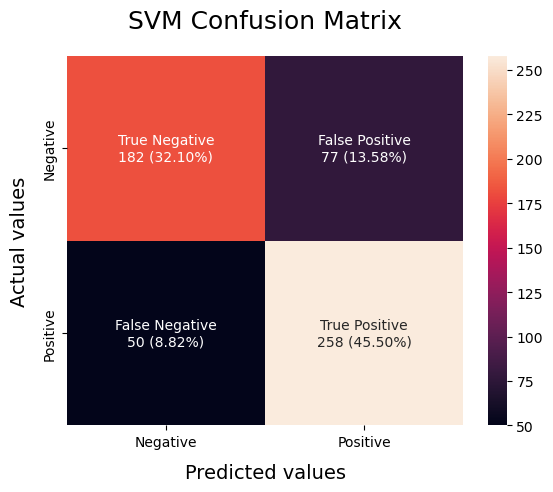

SVM  Classification Report: 
               precision    recall  f1-score   support

          No       0.78      0.70      0.74       259
         Yes       0.77      0.84      0.80       308

    accuracy                           0.78       567
   macro avg       0.78      0.77      0.77       567
weighted avg       0.78      0.78      0.77       567



In [12]:
train_model(SVM,"SVM")

In [13]:
LR=LogisticRegression()

 train_acc: 0.813410 , test_acc: 0.724868


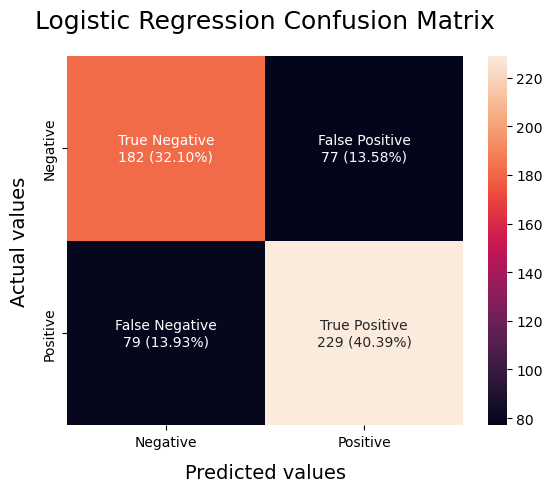

Logistic Regression  Classification Report: 
               precision    recall  f1-score   support

          No       0.70      0.70      0.70       259
         Yes       0.75      0.74      0.75       308

    accuracy                           0.72       567
   macro avg       0.72      0.72      0.72       567
weighted avg       0.73      0.72      0.72       567



In [14]:
train_model(LR,"Logistic Regression")

In [15]:
# with open("Stress_model.pkl", 'wb') as file:  
#     pickle.dump(SVM, file)

In [16]:
KNN=KNeighborsClassifier()

 train_acc: 0.775033 , test_acc: 0.680776


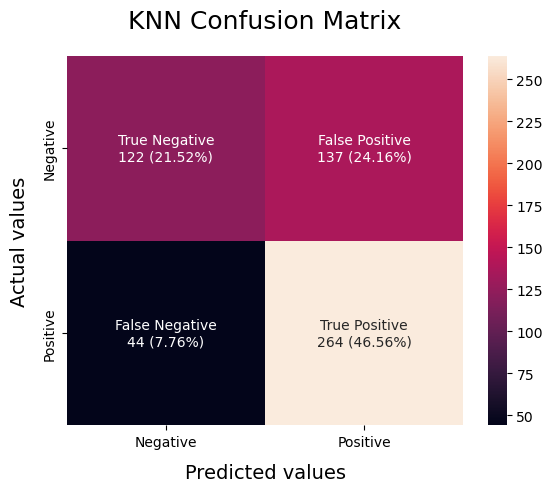

KNN  Classification Report: 
               precision    recall  f1-score   support

          No       0.73      0.47      0.57       259
         Yes       0.66      0.86      0.74       308

    accuracy                           0.68       567
   macro avg       0.70      0.66      0.66       567
weighted avg       0.69      0.68      0.67       567



In [17]:
train_model(KNN,"KNN")

In [18]:
DT=DecisionTreeClassifier()

 train_acc: 0.999559 , test_acc: 0.610229


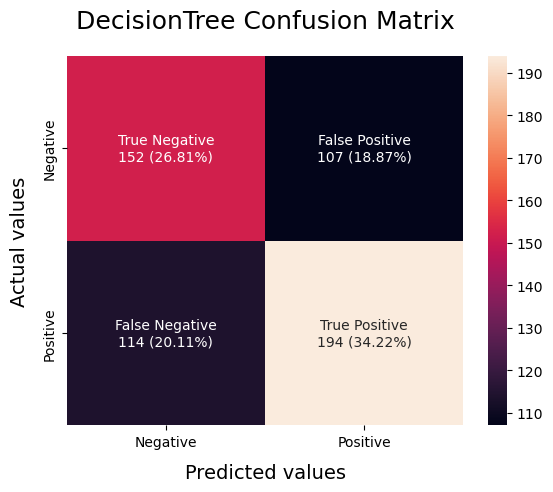

DecisionTree  Classification Report: 
               precision    recall  f1-score   support

          No       0.57      0.59      0.58       259
         Yes       0.64      0.63      0.64       308

    accuracy                           0.61       567
   macro avg       0.61      0.61      0.61       567
weighted avg       0.61      0.61      0.61       567



In [19]:
train_model(DT,"DecisionTree")

In [20]:
RF=RandomForestClassifier()

 train_acc: 0.999559 , test_acc: 0.714286


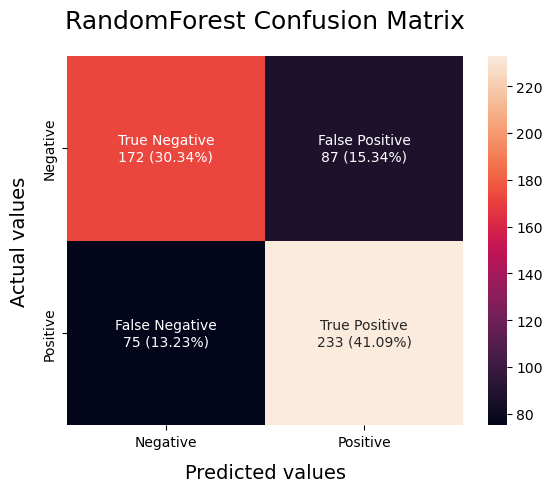

RandomForest  Classification Report: 
               precision    recall  f1-score   support

          No       0.70      0.66      0.68       259
         Yes       0.73      0.76      0.74       308

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567



In [21]:
train_model(RF,"RandomForest")

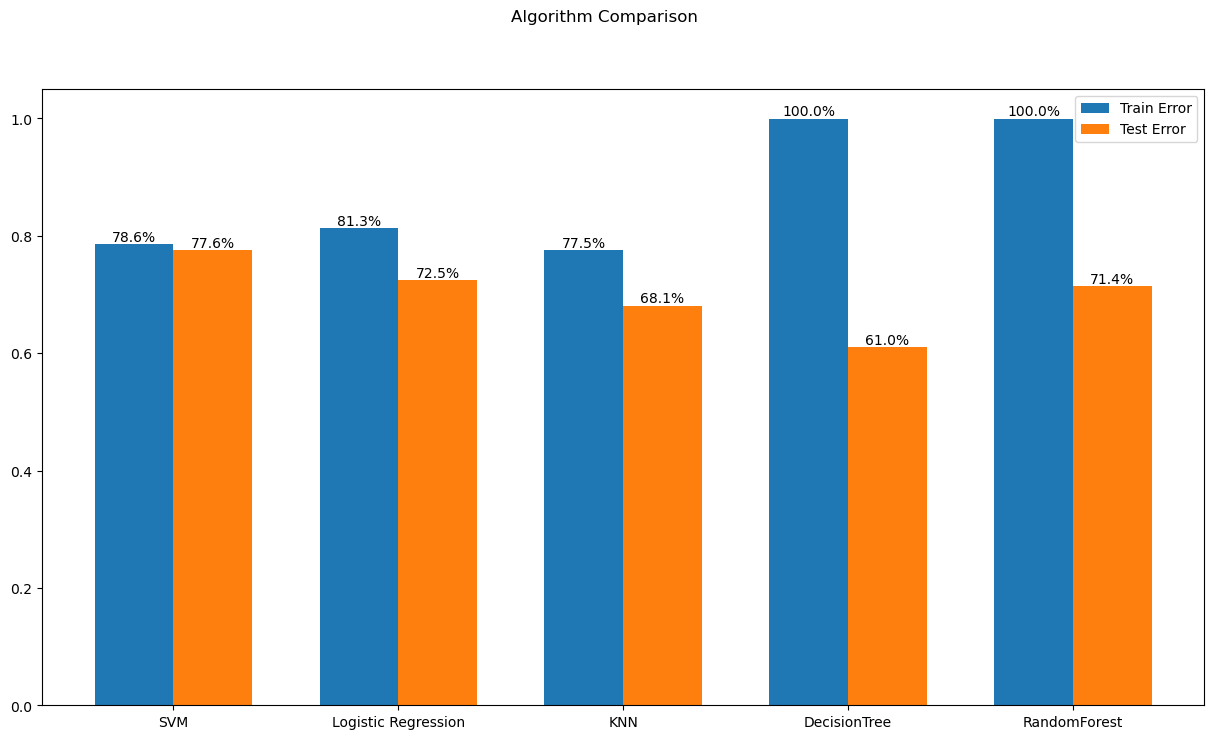

In [22]:
from matplotlib import pyplot as plt
import numpy as np



fig = plt.figure()
ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

# Create bar charts
bars1 = ax.bar(ind - width/2, train_results, width=width, label='Train Error')
bars2 = ax.bar(ind + width/2, test_results, width=width, label='Test Error')

fig.set_size_inches(15, 8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)

# Annotate bars with percentage values
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.1f}%', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.1f}%', ha='center', va='bottom')

plt.show()


In [23]:
# with open("LR_model.pkl", 'wb') as file:  
#     pickle.dump(LR, file)